# Importing libraries

In [47]:
import pandas as pd
import numpy as np

In [48]:
import seaborn as sns

In [49]:
from matplotlib import pyplot as plt

# Load data to Pandas

In [50]:
ls

First_notebook-Copy1.ipynb  fist_rfc_prediction2.csv
First_notebook-Copy2.ipynb  nomoon.png
First_notebook-Copy3.ipynb  sample.jpg
First_notebook-Copy4.ipynb  sample_submission.csv
First_notebook.ipynb        sample_submission.csv.7z
README.md                   test.json
Untitled.ipynb              test.json.7z
data/                       test_converted.csv
data-1/                     train.json
data-2/                     train.json.7z
fist_rfc_prediction.csv


In [51]:
df_train = pd.read_json("train.json")

In [52]:
df_train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [53]:
df_test = pd.read_json('test.json')

In [54]:
df_test.head()


,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",4023181e,32.615072
2,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",4371c8c3,43.918874


In [55]:
df_submission = pd.read_csv('sample_submission.csv')

In [56]:
df_submission.head()

,id,is_iceberg
0,5941774d,0.5
1,4023181e,0.5
2,b20200e4,0.5
3,e7f018bb,0.5
4,4371c8c3,0.5


# Data shape analysis

In [57]:
df_train.shape

(1604, 5)

## 1,604 data set in the train data.

In [58]:
df_train[df_train.is_iceberg == 1].shape

(753, 5)

## 753 out of 1064 data contain iceberg.

In [59]:
(753/1604)*100

46.94513715710723

##  46.95% of data contain iceberg.

In [60]:
df_test.shape

(8424, 4)

## 8,424 rows of data in the test data.  This is nearly 8 times bigger than the train data.

In [61]:
df_submission.shape

(8424, 2)

# Try to show the images contained in each row.

## 'band_1' image

In [62]:
df_train.band_1[0]

[-27.878360999999998,
 -27.15416,
 -28.668615,
 -29.537971,
 -29.092485,
 -32.834259,
 -32.190609,
 -29.538139,
 -28.668869,
 -29.092695,
 -26.813871,
 -26.813911,
 -28.264969,
 -25.571039,
 -26.170347,
 -25.571125,
 -28.265137,
 -28.265181,
 -26.170513,
 -28.669331,
 -24.232399,
 -25.571377,
 -30.504866,
 -31.031487,
 -29.538857,
 -27.879414,
 -26.814545,
 -24.484478,
 -25.571672,
 -28.265686,
 -29.539068,
 -28.669796,
 -27.509998,
 -31.031866,
 -31.03191,
 -31.03195,
 -29.53932,
 -29.53936,
 -34.286621,
 -28.670132,
 -25.866602,
 -27.510378,
 -26.171484,
 -26.487411,
 -30.009279,
 -31.032372,
 -26.487539,
 -29.539783,
 -31.032497,
 -29.094337,
 -28.670595,
 -26.815557,
 -25.28783,
 -25.572683,
 -31.032751,
 -36.030342,
 -33.531609,
 -31.593452,
 -29.094717,
 -27.880804,
 -26.815933,
 -27.156643,
 -27.880932,
 -31.593704,
 -31.593744,
 -30.010164,
 -31.033257,
 -28.267242,
 -25.012739,
 -25.288548,
 -27.157022,
 -26.48859,
 -25.573483,
 -26.488674,
 -30.507013,
 -28.66853,
 -27.878401

## images are stored as a lit of float numbers.

In [63]:
len(df_train.band_1[0])

5625

## One image data is 5625 array of floats. 

In [64]:
np.sqrt(len(df_train.band_1[0]))

75.0

## The image must br 75 x 75 then.

In [65]:
a1 = np.array(df_train.band_1[0])

In [66]:
a1

array([-27.878361, -27.15416 , -28.668615, ..., -26.817032, -27.881983,
       -28.268127])

## First convert to numpy arry for easier manipulation

In [67]:
a1 = a1.reshape(75,75)

## reshape to 75x75 2D array.

In [68]:
%matplotlib inline

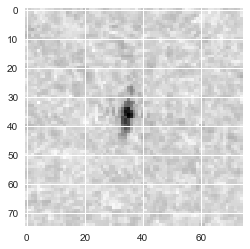

In [69]:
plt.imshow(a1)

## show image

## Do the same thing for the 'band_2' image.

In [132]:
b1 = df_train.band_2[0]

In [133]:
b1 = np.array(b1)

In [134]:
b1 = b1.reshape(75,75)

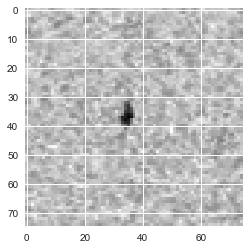

In [135]:
plt.imshow(b1)

In [139]:
from scipy import signal as sg

In [140]:
y = sg.convolve(b1, [[1, -1]], "same")

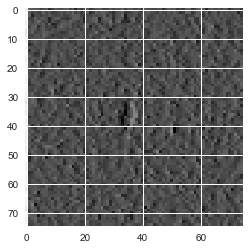

In [141]:
plt.imshow(y)

## This is the colum [0] data, thus this image is not of an iceburg.

## Try simple subtraction to see if it works.

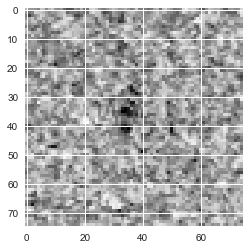

In [136]:
plt.imshow(a1-b1)

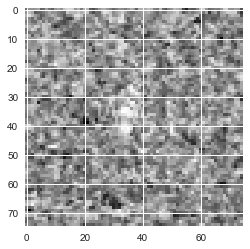

In [137]:
plt.imshow(b1-a1)

## Do the same thing with the data containing an iceberg.

## pick row 2 as an example with an iceberg.

In [76]:
a2 = np.array(df_train.band_1[2])

In [77]:
a2 = a2.reshape(75,75)

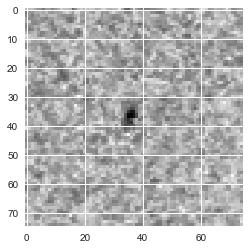

In [78]:
plt.imshow(a2)

In [79]:
b2 = np.array(df_train.band_2[2])

In [80]:
b2 = b2.reshape(75,75)

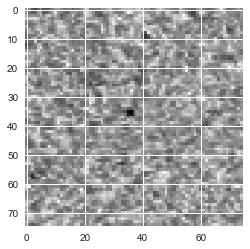

In [81]:
plt.imshow(b2)

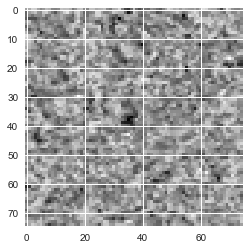

In [82]:
plt.imshow(a2-b2)

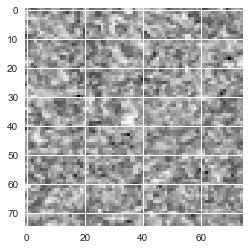

In [83]:
plt.imshow(b2-a2)

In [142]:
y = sg.convolve((b2-a2), [[1, -1]], "same")

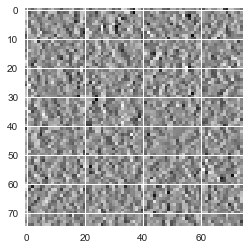

In [143]:
plt.imshow(y)

# My eyes cannot tell the difference within the subtracted images of an iceberg and a ship.


# Make some function

In [84]:
# imput an image value stored in the dataset
# then reshape the data and show image
################################################

def showimage(i):
    a = np.array(i)
    a = a.reshape(75,75)
    plt.imshow(a)

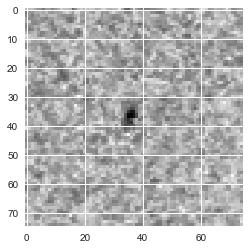

In [85]:
showimage(df_train.band_1[2])

In [88]:
# imput an image value stored in 'band_1' and 'band_2'
# then it will subtract the value and show image
################################################

def showimage_delta(i,k):
    a = np.array(i)
    a = a/np.mean(a)
    a = a.reshape(75,75)
    b = np.array(k)
    b = b/np.mean(b)
    b = b.reshape(75,75)
    c = a-b
    c = c/np.mean(c)
    plt.imshow(c)

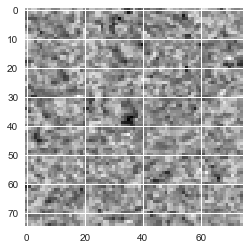

In [89]:
showimage_delta(df_train.band_1[2], df_train.band_2[2])

In [90]:
df_train.head(10)

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0
5,"[-20.769371, -20.769434, -25.906025, -25.90602...","[-29.288746, -29.712593, -28.884804, -28.88480...",b51d18b5,36.9034,1
6,"[-26.673811, -23.666162, -27.622442, -28.31768...","[-24.557735, -26.97868, -27.622442, -29.073456...",31da1a04,34.4751,1
7,"[-24.989119, -27.755224, -25.817074, -24.98927...","[-27.755173, -26.732174, -28.124943, -31.83772...",56929c16,41.1769,0
8,"[-17.146641, -17.146572, -17.994583, -19.44553...","[-25.733608, -24.472507, -24.710424, -22.77215...",525ab75c,35.7829,0
9,"[-24.020853, -23.551275, -27.18819, -29.126434...","[-28.702518, -33.563324, -29.571918, -29.12643...",192f56eb,43.3007,0


## This image contains an iceberg

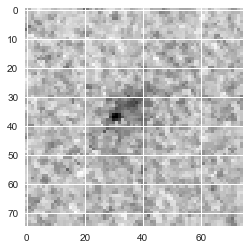

In [91]:
showimage_delta(df_train.band_1[5], df_train.band_2[5])

## this image does not contain an iceberg

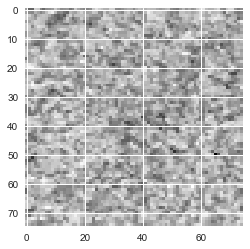

In [92]:
showimage_delta(df_train.band_1[4], df_train.band_2[4])

# These particular examples are readable with my own eyes.

# to be continued...

#  Make a function to first normalize the image array and return the difference between two image data.

In [207]:
def return_delta(i,k):
    a = np.array(i)
    a = a/np.mean(a)
    b = np.array(k)
    b = b/np.mean(b)
    c = a-b
    return c

In [208]:
return_delta(df_train.band_1[4], df_train.band_2[4])

array([-0.03286535, -0.26438922, -0.26438922, ...,  0.05653425,
        0.17292422,  0.02378693])

##  Apply this function to all rows of the train dataset

In [209]:
for i in range(len(df_train)):
    k = return_delta(df_train.band_1[i], df_train.band_2[i])
    if i == 0:
        h = k
    else:
        h = np.vstack((h,k))
    

In [210]:
h

array([[ 0.09097179, -0.01467275, -0.01031927, ..., -0.05916957,
         0.04034833,  0.04001306],
       [-0.34001272, -0.00374483,  0.0490561 , ..., -0.24611245,
        -0.38678476, -0.35581989],
       [ 0.06597996,  0.09731533,  0.24734438, ..., -0.01953109,
        -0.05929406,  0.05512375],
       ..., 
       [ 0.0445244 , -0.11360989, -0.04773859, ..., -0.04513936,
         0.013847  , -0.11729383],
       [ 0.01368465,  0.33797595,  0.41511913, ...,  0.00266499,
        -0.01192718, -0.03894321],
       [-0.00123299,  0.01564052, -0.11485934, ..., -0.06363777,
        -0.05011732, -0.27023921]])

In [211]:
df = pd.DataFrame(h)

In [212]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5615,5616,5617,5618,5619,5620,5621,5622,5623,5624
0,0.090972,-0.014673,-0.010319,-0.017951,-0.055434,0.138924,0.115861,-0.039471,0.068651,0.134466,...,0.002092,-0.022638,0.173135,-0.009229,-0.103939,0.039076,0.069673,-0.059170,0.040348,0.040013
1,-0.340013,-0.003745,0.049056,-0.003597,-0.107663,-0.239857,-0.054180,-0.004521,-0.124949,-0.107868,...,-0.265811,-0.181000,-0.224948,-0.016893,-0.018701,-0.195575,-0.119709,-0.246112,-0.386785,-0.355820
2,0.065980,0.097315,0.247344,0.222849,0.059640,-0.034006,0.017166,0.136024,0.108035,-0.043351,...,-0.065363,0.006243,0.121393,0.066482,0.001734,-0.153571,-0.132446,-0.019531,-0.059294,0.055124
3,0.024189,0.063756,0.115176,0.049625,0.082187,0.060168,-0.014110,0.074502,0.234356,0.169321,...,0.045989,0.052533,0.001913,-0.138828,-0.238285,-0.176560,-0.011248,0.023305,0.155162,0.086934
4,-0.032865,-0.264389,-0.264389,0.159829,0.129358,-0.133234,-0.246088,-0.104708,-0.090687,-0.048533,...,-0.087352,-0.047680,-0.049402,0.113279,0.041267,0.080861,0.030396,0.056534,0.172924,0.023787


In [213]:
df.shape

(1604, 5625)

In [214]:
df_train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [215]:
df['is_iceberg']=df_train['is_iceberg']

In [216]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,is_iceberg
0,0.090972,-0.014673,-0.010319,-0.017951,-0.055434,0.138924,0.115861,-0.039471,0.068651,0.134466,...,-0.022638,0.173135,-0.009229,-0.103939,0.039076,0.069673,-0.059170,0.040348,0.040013,0
1,-0.340013,-0.003745,0.049056,-0.003597,-0.107663,-0.239857,-0.054180,-0.004521,-0.124949,-0.107868,...,-0.181000,-0.224948,-0.016893,-0.018701,-0.195575,-0.119709,-0.246112,-0.386785,-0.355820,0
2,0.065980,0.097315,0.247344,0.222849,0.059640,-0.034006,0.017166,0.136024,0.108035,-0.043351,...,0.006243,0.121393,0.066482,0.001734,-0.153571,-0.132446,-0.019531,-0.059294,0.055124,1
3,0.024189,0.063756,0.115176,0.049625,0.082187,0.060168,-0.014110,0.074502,0.234356,0.169321,...,0.052533,0.001913,-0.138828,-0.238285,-0.176560,-0.011248,0.023305,0.155162,0.086934,0
4,-0.032865,-0.264389,-0.264389,0.159829,0.129358,-0.133234,-0.246088,-0.104708,-0.090687,-0.048533,...,-0.047680,-0.049402,0.113279,0.041267,0.080861,0.030396,0.056534,0.172924,0.023787,0


In [217]:
df

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,is_iceberg
0,0.090972,-0.014673,-0.010319,-0.017951,-0.055434,0.138924,0.115861,-0.039471,0.068651,0.134466,...,-0.022638,0.173135,-0.009229,-0.103939,0.039076,0.069673,-0.059170,0.040348,0.040013,0
1,-0.340013,-0.003745,0.049056,-0.003597,-0.107663,-0.239857,-0.054180,-0.004521,-0.124949,-0.107868,...,-0.181000,-0.224948,-0.016893,-0.018701,-0.195575,-0.119709,-0.246112,-0.386785,-0.355820,0
2,0.065980,0.097315,0.247344,0.222849,0.059640,-0.034006,0.017166,0.136024,0.108035,-0.043351,...,0.006243,0.121393,0.066482,0.001734,-0.153571,-0.132446,-0.019531,-0.059294,0.055124,1
3,0.024189,0.063756,0.115176,0.049625,0.082187,0.060168,-0.014110,0.074502,0.234356,0.169321,...,0.052533,0.001913,-0.138828,-0.238285,-0.176560,-0.011248,0.023305,0.155162,0.086934,0
4,-0.032865,-0.264389,-0.264389,0.159829,0.129358,-0.133234,-0.246088,-0.104708,-0.090687,-0.048533,...,-0.047680,-0.049402,0.113279,0.041267,0.080861,0.030396,0.056534,0.172924,0.023787,0
5,-0.042348,-0.057986,0.229396,0.229396,0.429098,0.299205,0.170668,0.152933,0.218276,0.021788,...,0.196773,0.160601,0.070473,-0.019705,-0.108611,-0.265253,-0.262893,0.021447,0.143029,1
6,0.134913,-0.075660,0.057225,0.030217,0.057931,0.256843,0.245465,0.101770,0.109611,0.109611,...,-0.017679,0.163636,-0.000770,0.060245,0.157914,0.157914,0.125969,0.088778,0.091008,1
7,-0.065388,0.073738,-0.047904,-0.211292,-0.013971,-0.013971,0.047094,0.290216,0.247330,0.075729,...,-0.002979,-0.172432,-0.143683,-0.032566,0.184804,0.181689,0.215619,0.039301,0.203820,0
8,0.009589,0.062967,0.107242,0.282274,0.440766,0.412461,0.022019,0.029344,0.052883,0.249845,...,0.185676,0.009510,0.249777,0.185484,0.175988,0.133118,0.130699,0.104643,0.026831,0
9,-0.045868,-0.233062,0.049216,0.141314,0.076831,-0.165823,-0.231443,-0.125261,0.011430,0.183739,...,-0.045851,0.048388,0.078710,-0.138141,-0.104039,-0.041473,-0.118114,-0.118114,-0.118932,0


In [218]:
df.to_csv('converted_train2.csv', index = False)

#  Use this data for Machine Learning

#  Test with Random Forest Classifier first

In [219]:
df = df.fillna(0)

In [220]:
y_train = df.pop('is_iceberg')

In [221]:
x_train = df

In [222]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [223]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(metrics.accuracy_score(ypred, ytest))




0.660847880299


In [224]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(metrics.accuracy_score(ypred, ytest))




0.573566084788


In [225]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=200, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(metrics.accuracy_score(ypred, ytest))




0.645885286783


In [226]:
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y_train, random_state=0)
clf = RandomForestClassifier(n_estimators=110, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(metrics.accuracy_score(ypred, ytest))




0.655860349127


In [227]:
from sklearn.ensemble import GradientBoostingClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train, random_state=0)
gbt = GradientBoostingClassifier(max_depth=2, n_estimators=2)
gbt.fit(Xtrain, ytrain)
ypred = gbt.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.49875311720698257

In [228]:
from sklearn.ensemble import GradientBoostingClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train, random_state=0)
gbt = GradientBoostingClassifier(max_depth=3, n_estimators=3)
gbt.fit(Xtrain, ytrain)
ypred = gbt.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.50374064837905241

In [229]:
from sklearn.ensemble import GradientBoostingClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train, random_state=0)
gbt = GradientBoostingClassifier(max_depth=4, n_estimators=4)
gbt.fit(Xtrain, ytrain)
ypred = gbt.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.6059850374064838

In [230]:
from sklearn.ensemble import GradientBoostingClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train, random_state=0)
gbt = GradientBoostingClassifier(max_depth=5, n_estimators=5)
gbt.fit(Xtrain, ytrain)
ypred = gbt.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.6059850374064838

In [231]:
from sklearn.ensemble import GradientBoostingClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train, random_state=0)
gbt = GradientBoostingClassifier(max_depth=4, n_estimators=200)
gbt.fit(Xtrain, ytrain)
ypred = gbt.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.66334164588528677

In [232]:
from sklearn.ensemble import GradientBoostingClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train,y_train, random_state=0)
gbt = GradientBoostingClassifier(max_depth=4, n_estimators=400)
gbt.fit(Xtrain, ytrain)
ypred = gbt.predict(Xtest)
metrics.accuracy_score(ypred, ytest)

0.69077306733167088

# 0.69077306733167088 is the highest:  GBClassifier

# Convert the test data in the same way.

In [234]:
for i in range(len(df_test)):
    k = return_delta(df_test.band_1[i], df_test.band_2[i])
    if i == 0:
        h = k
    else:
        h = np.vstack((h,k))
    

In [235]:
df_t = pd.DataFrame(h)

In [236]:
df_t.to_csv('test_converted.csv')

In [237]:
df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,5615,5616,5617,5618,5619,5620,5621,5622,5623,5624
0,0.100055,0.078763,0.132659,0.030190,-0.147580,-0.189261,0.080243,0.160003,0.228850,0.125497,...,-0.075666,-0.189301,-0.174575,-0.125064,0.075800,0.295205,0.244569,0.004318,-0.100926,-0.065847
1,0.013151,0.013151,0.013151,0.040433,0.040433,-0.050573,-0.181765,-0.181765,0.184979,-0.013677,...,0.153643,-0.059968,-0.059968,0.045042,-0.059232,0.032755,-0.009495,-0.061342,0.092301,-0.059655
2,-0.034574,0.021983,0.155120,-0.046640,0.002951,-0.127056,-0.115976,-0.083382,0.006674,0.197529,...,-0.005355,0.010808,-0.076890,0.008025,-0.168114,0.010324,0.113308,0.055307,-0.126539,0.089538
3,-0.167495,-0.145842,0.148512,-0.050508,-0.050508,-0.095747,-0.023462,-0.025905,-0.289652,0.107666,...,-0.050550,-0.120654,-0.120654,0.119834,0.094485,-0.326814,-0.310769,-0.552801,-0.183470,0.126002
4,-0.104437,-0.047081,0.205464,-0.137309,-0.050550,-0.104437,0.183069,-0.004027,-0.093010,-0.044610,...,0.018646,0.090374,0.051305,0.144272,-0.272002,0.185685,-0.084711,-0.024685,0.100950,-0.013454


## Predict the provability

In [238]:
gbt.predict_proba(df_t)

array([[ 0.98871455,  0.01128545],
       [ 0.93184543,  0.06815457],
       [ 0.92405655,  0.07594345],
       ..., 
       [ 0.65190077,  0.34809923],
       [ 0.00380099,  0.99619901],
       [ 0.6174421 ,  0.3825579 ]])

In [239]:
s = gbt.predict_proba(df_t)

In [240]:
s[:,1]

array([ 0.01128545,  0.06815457,  0.07594345, ...,  0.34809923,
        0.99619901,  0.3825579 ])

#  Make a submission file

In [241]:
df_submission.head()

,id,is_iceberg
0,5941774d,0.5
1,4023181e,0.5
2,b20200e4,0.5
3,e7f018bb,0.5
4,4371c8c3,0.5


In [248]:
df_submission.is_iceberg = s[:,1]

In [249]:
df_submission.head()

,id,is_iceberg
0,5941774d,0.011285
1,4023181e,0.068155
2,b20200e4,0.075943
3,e7f018bb,0.144595
4,4371c8c3,0.163109


In [250]:
df_submission.to_csv('fist_gbt_prediction3.csv', index = False)

# Scored 0.6931 at Kaggle, which was not better than the previous random forest result.